In [1]:
import pandas as pd
import numpy as np

In [2]:
from acquire import github_api_request

In [3]:
# Standard imports for scrpaing
from requests import get
from bs4 import BeautifulSoup
import os



# Used to run selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


In [4]:
from env import github_token, github_username

In [5]:
import sys

sys.path.append('..')

import prepare
from prepare import clean_strings, tokenize, remove_stopwords, stem, lemmatize

In [443]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk


In [7]:
url = 'https://github.com/trending?spoken_language_code=en'
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
response = get(url, headers=headers)


In [8]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.content, 'html.parser')
# print(soup)
soup.h3
links = soup.find_all('h2', class_="h3 lh-condensed")
links


[<h2 class="h3 lh-condensed">
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_REPOSITORIES_PAGE","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":400215964,"originating_url":"https://github.com/trending?spoken_language_code=en","user_id":null}}' data-hydro-click-hmac="ec107ceae8568995e43964ff62b0e50330a4bd1eec0a74e4e3b5165d1ff0756b" data-view-component="true" href="/novuhq/novu">
 <svg aria-hidden="true" class="octicon octicon-repo mr-1 color-fg-muted" data-view-component="true" height="16" version="1.1" viewbox="0 0 16 16" width="16">
 <path d="M2 2.5A2.5 2.5 0 0 1 4.5 0h8.75a.75.75 0 0 1 .75.75v12.5a.75.75 0 0 1-.75.75h-2.5a.75.75 0 0 1 0-1.5h1.75v-2h-8a1 1 0 0 0-.714 1.7.75.75 0 1 1-1.072 1.05A2.495 2.495 0 0 1 2 11.5Zm10.5-1h-8a1 1 0 0 0-1 1v6.708A2.486 2.486 0 0 1 4.5 9h8ZM5 12.25a.25.25 0 0 1 .25-.25h3.5a.25.25 0 0 1 .25.25v3.25a.25.25 0 0 1-.4.2l-1.45-1.087a.249.2

In [9]:
links[0].a['href']

'/novuhq/novu'

In [10]:
[link.a['href'] for link in links]

['/novuhq/novu',
 '/ververica/flink-cdc-connectors',
 '/Sophia-Community/SophiApp',
 '/groue/GRDB.swift',
 '/cloud-hypervisor/cloud-hypervisor',
 '/BlinkDL/RWKV-LM',
 '/tuist/tuist',
 '/intitni/CopilotForXcode',
 '/openai/whisper',
 '/Mbed-TLS/mbedtls',
 '/dorny/paths-filter',
 '/traefik/traefik',
 '/pimcore/pimcore',
 '/faker-ruby/faker',
 '/prometheus/node_exporter',
 '/microsoft/fluentui-react-native',
 '/AleoHQ/snarkOS',
 '/marqo-ai/marqo',
 '/SimplifyJobs/Summer2024-Internships',
 '/go-sql-driver/mysql',
 '/microsoft/microsoft-ui-xaml',
 '/codecrafters-io/build-your-own-x',
 '/ixartz/Next-js-Boilerplate',
 '/psf/black',
 '/grpc/grpc-java']

In [11]:
path_list = ['daily', 'weekly', 'monthly']

In [12]:
repo_urls = []

for path in path_list:
    url = f'https://github.com/trending?since={path}&spoken_language_code=en'
    headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
    response = get(url, headers=headers)
    # Make a soup variable holding the response content
    
    soup = BeautifulSoup(response.content, 'html.parser')
    # print(soup)
    soup.h3
    links = soup.find_all('h2', class_="h3 lh-condensed")
    
#     links_dict = {
#         path : [link.a['href'] for link in links]
#     }
    
    
    repo_urls += [link.a['href'] for link in links]

In [13]:
repo_urls

['/novuhq/novu',
 '/ververica/flink-cdc-connectors',
 '/Sophia-Community/SophiApp',
 '/groue/GRDB.swift',
 '/cloud-hypervisor/cloud-hypervisor',
 '/BlinkDL/RWKV-LM',
 '/tuist/tuist',
 '/intitni/CopilotForXcode',
 '/openai/whisper',
 '/Mbed-TLS/mbedtls',
 '/dorny/paths-filter',
 '/traefik/traefik',
 '/pimcore/pimcore',
 '/faker-ruby/faker',
 '/prometheus/node_exporter',
 '/microsoft/fluentui-react-native',
 '/AleoHQ/snarkOS',
 '/marqo-ai/marqo',
 '/SimplifyJobs/Summer2024-Internships',
 '/go-sql-driver/mysql',
 '/microsoft/microsoft-ui-xaml',
 '/codecrafters-io/build-your-own-x',
 '/ixartz/Next-js-Boilerplate',
 '/psf/black',
 '/grpc/grpc-java',
 '/yt-dlp/yt-dlp',
 '/sei-protocol/sei-chain',
 '/codecrafters-io/build-your-own-x',
 '/immich-app/immich',
 '/SimplifyJobs/Summer2024-Internships',
 '/binhnguyennus/awesome-scalability',
 '/steven2358/awesome-generative-ai',
 '/Z4nzu/hackingtool',
 '/Infisical/infisical',
 '/microsoft/Web-Dev-For-Beginners',
 '/modelscope/modelscope',
 '/poteto

In [14]:
url_df = pd.DataFrame(repo_urls)

In [15]:
url_df.head()


,0
0,/novuhq/novu
1,/ververica/flink-cdc-connectors
2,/Sophia-Community/SophiApp
3,/groue/GRDB.swift
4,/cloud-hypervisor/cloud-hypervisor


In [16]:
url_df.drop_duplicates(inplace=True)


In [17]:
len(url_df)

62

In [18]:
url_df[0].to_list()

['/novuhq/novu',
 '/ververica/flink-cdc-connectors',
 '/Sophia-Community/SophiApp',
 '/groue/GRDB.swift',
 '/cloud-hypervisor/cloud-hypervisor',
 '/BlinkDL/RWKV-LM',
 '/tuist/tuist',
 '/intitni/CopilotForXcode',
 '/openai/whisper',
 '/Mbed-TLS/mbedtls',
 '/dorny/paths-filter',
 '/traefik/traefik',
 '/pimcore/pimcore',
 '/faker-ruby/faker',
 '/prometheus/node_exporter',
 '/microsoft/fluentui-react-native',
 '/AleoHQ/snarkOS',
 '/marqo-ai/marqo',
 '/SimplifyJobs/Summer2024-Internships',
 '/go-sql-driver/mysql',
 '/microsoft/microsoft-ui-xaml',
 '/codecrafters-io/build-your-own-x',
 '/ixartz/Next-js-Boilerplate',
 '/psf/black',
 '/grpc/grpc-java',
 '/yt-dlp/yt-dlp',
 '/sei-protocol/sei-chain',
 '/immich-app/immich',
 '/binhnguyennus/awesome-scalability',
 '/steven2358/awesome-generative-ai',
 '/Z4nzu/hackingtool',
 '/Infisical/infisical',
 '/microsoft/Web-Dev-For-Beginners',
 '/modelscope/modelscope',
 '/poteto/hiring-without-whiteboards',
 '/awesome-selfhosted/awesome-selfhosted',
 '/ope

In [19]:
url = 'https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories'
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
response = get(url, headers=headers)


In [20]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.content, 'html.parser')
# print(soup)
soup
# links = soup.find_all('div', class_="Box-sc-g0xbh4-0 bBwPjs search-title")
# links

{"payload":{"header_redesign_enabled":false,"results":[{"id":"745502","archived":false,"color":"#563d7c","followers":2797,"has_funding_file":false,"hl_name":"senchalabs/jQTouch","hl_trunc_description":"Create powerful mobile apps with just HTML, CSS, and Zepto.js (or jQuery).","language":"CSS","mirror":false,"owned_by_organization":true,"public":true,"repo":{"repository":{"id":745502,"name":"jQTouch","owner_id":313839,"owner_login":"senchalabs","updated_at":"2021-02-18T21:43:34.094Z","has_issues":true}},"sponsorable":false,"topics":[],"type":"Public","help_wanted_issues_count":0,"good_first_issue_issues_count":0,"starred_by_current_user":false},{"id":"1076724","archived":false,"color":"#438eff","followers":2753,"has_funding_file":false,"hl_name":"chrismiles/CMPopTipView","hl_trunc_description":"Custom UIView for iOS that pops up an animated \"bubble\" pointing at a button or other view. Useful for popup tips.","language":"Objective-C","mirror":false,"owned_by_organization":false,"publi

In [21]:
# df['your_column_here'] = df['your_column_here'].apply(lambda string: remove_stopwords(tokenize(basic_clean(string))))
# df.head()

In [22]:
import json

# Specify the path to your JSON file
json_file_path = "data2.json"

# Read the JSON data from the file and load it into a Python dictionary
with open(json_file_path, "r") as json_file:
    df = json.load(json_file)



In [23]:
df = pd.DataFrame(df)

In [24]:
df

,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
2,SmartThingsCommunity/SmartThingsPublic,Groovy,# Welcome to the SmartThings Public GitHub Rep...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
4,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...
...,...,...,...
296,dbader/readme-template,None,# Product Name\n> Short blurb about what your ...
297,PHPOffice/PHPExcel,PHP,"# PHPExcel - DEAD\n\nPHPExcel last version, 1...."
298,bradtraversy/vanillawebprojects,JavaScript,# 20+ Web Projects With Vanilla JavaScript\n\n...
299,ightscout/cgm-remote-monitor,None,Nightscout Web Monitor (a.k.a. cgm-remote-moni...


In [25]:
df['cleaned'] = df['readme_contents'].apply(lambda string: remove_stopwords(tokenize(clean_strings(string))))
df.head()

,repo,language,readme_contents,cleaned
0,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone needs sha...
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...
2,SmartThingsCommunity/SmartThingsPublic,Groovy,# Welcome to the SmartThings Public GitHub Rep...,welcome smartthings public github repo repo co...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....",div aligncenter img srchttpswwwtensorfloworgim...
4,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...,collection gitignore templates githubs collect...


In [26]:
df['stem'] = df['cleaned'].apply(lambda string: stem(string))
df.head(3)

,repo,language,readme_contents,cleaned,stem
0,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone needs sha...,share data statistician guid anyon need share ...
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,well hello repositori meant provid exampl fork...
2,SmartThingsCommunity/SmartThingsPublic,Groovy,# Welcome to the SmartThings Public GitHub Rep...,welcome smartthings public github repo repo co...,welcom smartth public github repo repo contain...


In [27]:
df['lemmatize'] = df['cleaned'].apply(lambda string: lemmatize(string))
df.head(3)

,repo,language,readme_contents,cleaned,stem,lemmatize
0,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone needs sha...,share data statistician guid anyon need share ...,share data statistician guide anyone need shar...
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,well hello repositori meant provid exampl fork...,well hello repository meant provide example fo...
2,SmartThingsCommunity/SmartThingsPublic,Groovy,# Welcome to the SmartThings Public GitHub Rep...,welcome smartthings public github repo repo co...,welcom smartth public github repo repo contain...,welcome smartthings public github repo repo co...


In [28]:
df.language.value_counts()

JavaScript                  47
Python                      39
Java                        30
TypeScript                  21
Go                          17
HTML                        16
C++                         15
Jupyter Notebook            11
C                           11
Shell                        9
C#                           5
Ruby                         5
PHP                          5
TeX                          3
Dockerfile                   3
Kotlin                       3
CSS                          3
Scala                        2
Swift                        2
Vue                          2
Groovy                       2
Markdown                     1
AsciiDoc                     1
CoffeeScript                 1
MDX                          1
Pascal                       1
Wikitext                     1
CMake                        1
DIGITAL Command Language     1
SCSS                         1
Batchfile                    1
Objective-C                  1
Dart    

In [29]:
df.language.value_counts().sum()


267

In [30]:
df[df.language.isnull()==True]

,repo,language,readme_contents,cleaned,stem,lemmatize
0,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone needs sha...,share data statistician guid anyon need share ...,share data statistician guide anyone need shar...
4,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...,collection gitignore templates githubs collect...,collect gitignor templat github collect gitign...,collection gitignore template githubs collecti...
8,jwasham/coding-interview-university,None,# Coding Interview University\n\n> I originall...,coding interview university originally created...,code interview univers origin creat short todo...,coding interview university originally created...
9,firstcontributions/first-contributions,None,[![Open Source Love](https://firstcontribution...,open source lovehttpsfirstcontributionsgithubi...,open sourc lovehttpsfirstcontributionsgithubio...,open source lovehttpsfirstcontributionsgithubi...
11,EbookFoundation/free-programming-books,None,# List of Free Learning Resources In Many Lang...,list free learning resources many languages di...,list free learn resourc mani languag div align...,list free learning resource many language div ...
14,CyC2018/CS-Notes,None,"<div align=""center"">\r\n <a href=""https://w...",div aligncenter hrefhttpswwwcyc2018xyz img src...,div aligncent hrefhttpswwwcyc2018xyz img srcht...,div aligncenter hrefhttpswwwcyc2018xyz img src...
37,getify/You-Dont-Know-JS,None,# You Don't Know JS Yet (book series) - 2nd Ed...,' know js yet book series 2nd edition series b...,' know js yet book seri 2nd edit seri book div...,' know j yet book series 2nd edition series bo...
48,justjavac/free-programming-books-zh_CN,None,免费的编程中文书籍索引\n============================\n\n[...,httpsimgshieldsiogithubissuesjustjavacfreeprog...,httpsimgshieldsiogithubissuesjustjavacfreeprog...,httpsimgshieldsiogithubissuesjustjavacfreeprog...
56,sindresorhus/awesome,None,"<div align=""center"">\n\t<a href=""https://vshym...",div aligncenter &#9; hrefhttpsvshymanskyygithu...,div aligncent &#9; hrefhttpsvshymanskyygithubi...,div aligncenter &#9; hrefhttpsvshymanskyygithu...
82,CocoaPods/Specs,None,# The CocoaPods Master Repo\n\nThis repository...,cocoapods master repo repository contains publ...,cocoapod master repo repositori contain public...,cocoapods master repo repository contains publ...


In [31]:
df[df.duplicated()]

,repo,language,readme_contents,cleaned,stem,lemmatize


In [32]:
df['target'] = df['language'].apply(lambda val: 1 if val == 'Python' else (2 if val == 'JavaScript' else 0))


In [33]:
df.tail(20)

,repo,language,readme_contents,cleaned,stem,lemmatize,target
281,gcc-mirror/gcc,C,This directory contains the GNU Compiler Colle...,directory contains gnu compiler collection gcc...,directori contain gnu compil collect gcc gnu c...,directory contains gnu compiler collection gcc...,0
282,dragen1860/Deep-Learning-with-TensorFlow-book,Jupyter Notebook,# TensorFlow 2深度学习开源书(龙书)\n\n基于TensorFlow 2正式版...,tensorflow 2 tensorflow 2 httpsitemjdcom129548...,tensorflow 2 tensorflow 2 httpsitemjdcom129548...,tensorflow 2 tensorflow 2 httpsitemjdcom129548...,0
283,playframework/playframework,Scala,<!--- Copyright (C) from 2022 The Play Framewo...,copyright c 2022 play framework contributors h...,copyright c 2022 play framework contributor ht...,copyright c 2022 play framework contributor ht...,0
284,apache/storm,Java,Master Branch: \n[![Java CI with Maven](https...,master branch java ci mavenhttpsgithubcomapach...,master branch java ci mavenhttpsgithubcomapach...,master branch java ci mavenhttpsgithubcomapach...,0
285,argoproj/argo-cd,Go,**Releases:**\n[![Release Version](https://img...,releases release versionhttpsimgshieldsiogithu...,releas releas versionhttpsimgshieldsiogithubvr...,release release versionhttpsimgshieldsiogithub...,0
286,grpc/grpc-go,Go,# gRPC-Go\n\n[![Build Status](https://travis-c...,grpcgo build statushttpstravisciorggrpcgrpcgos...,grpcgo build statushttpstravisciorggrpcgrpcgos...,grpcgo build statushttpstravisciorggrpcgrpcgos...,0
287,codecombat/codecombat,CoffeeScript,"# CodeCombat\n\n<div style=""text-align:center""...",codecombat div styletextaligncenter hrefhttpco...,codecombat div styletextaligncent hrefhttpcode...,codecombat div styletextaligncenter hrefhttpco...,0
288,zealvora/terraform-beginner-to-advanced-resource,HCL,## HashiCorp Certified Terraform: Associate 20...,hashicorp certified terraform associate 2023 g...,hashicorp certifi terraform associ 2023 git re...,hashicorp certified terraform associate 2023 g...,0
289,nuxt/nuxt,TypeScript,\n[![Nuxt banner](./.github/assets/banner.png)...,nuxt bannergithubassetsbannerpnghttpsnuxtcom w...,nuxt bannergithubassetsbannerpnghttpsnuxtcom w...,nuxt bannergithubassetsbannerpnghttpsnuxtcom w...,0
290,gradle/gradle,Groovy,"<picture>\n <source media=""(prefers-color-sch...",picture source mediapreferscolorscheme dark sr...,pictur sourc mediapreferscolorschem dark srcse...,picture source mediapreferscolorscheme dark sr...,0


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
labels = pd.concat([df.target.value_counts(),
                    df.target.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']

In [36]:
labels

,n,percent
0,215,0.714286
2,47,0.156146
1,39,0.129568


In [37]:
df.reset_index(drop=True, inplace=True)

In [38]:
df.tail()

,repo,language,readme_contents,cleaned,stem,lemmatize,target
296,dbader/readme-template,None,# Product Name\n> Short blurb about what your ...,product name short blurb product npm versionnp...,product name short blurb product npm versionnp...,product name short blurb product npm versionnp...,0
297,PHPOffice/PHPExcel,PHP,"# PHPExcel - DEAD\n\nPHPExcel last version, 1....",phpexcel dead phpexcel last version 181 releas...,phpexcel dead phpexcel last version 181 releas...,phpexcel dead phpexcel last version 181 releas...,0
298,bradtraversy/vanillawebprojects,JavaScript,# 20+ Web Projects With Vanilla JavaScript\n\n...,20 web projects vanilla javascript main reposi...,20 web project vanilla javascript main reposit...,20 web project vanilla javascript main reposit...,2
299,ightscout/cgm-remote-monitor,None,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,0
300,X-net/XX-Net,None,# XX-NET,xxnet,xxnet,xxnet,0


# Split the data

In [397]:
df, _, _ = prepare.split_data()

In [398]:
df[df['language'].isna()]
df.dropna(inplace=True)

# Exploration

In [399]:
python_words = ' '.join(df[df.target == 1]['stem']).split()
js_words = ' '.join(df[df.target == 2]['stem']).split()
other_words = ' '.join(df[df.target == 0]['stem']).split()
all_words = ' '.join(df.stem).split()

In [400]:
len(python_words)

14030

In [401]:
filtered_python_words = [word for word in python_words if len(word) <= 20]
python_words = [word for word in filtered_python_words if len(word) > 1]
python_words = [word for word in python_words if not word.isdigit()]

In [402]:
python_words

['tornado',
 'web',
 'server',
 'imag',
 'alt',
 'join',
 'chat',
 'target',
 'tornado',
 'httpwwwtornadoweborg',
 'python',
 'web',
 'framework',
 'asynchron',
 'network',
 'librari',
 'origin',
 'develop',
 'friendfe',
 'httpfriendfeedcom',
 'use',
 'nonblock',
 'network',
 'io',
 'tornado',
 'scale',
 'ten',
 'thousand',
 'open',
 'connect',
 'make',
 'ideal',
 'long',
 'poll',
 'websocket',
 'applic',
 'requir',
 'longliv',
 'connect',
 'user',
 'hello',
 'world',
 'simpl',
 'hello',
 'world',
 'exampl',
 'web',
 'app',
 'tornado',
 'codeblock',
 'python',
 'import',
 'asyncio',
 'import',
 'tornado',
 'class',
 'def',
 'getself',
 'selfwritehello',
 'world',
 'def',
 'makeapp',
 'return',
 'tornadowebappl',
 'mainhandl',
 'async',
 'def',
 'main',
 'app',
 'makeapp',
 'applisten8888',
 'await',
 'asyncioeventwait',
 'name',
 'main',
 'asynciorunmain',
 'exampl',
 'use',
 'tornado',
 'asynchron',
 'featur',
 'see',
 'simpl',
 'chat',
 'room',
 'document',
 'document',
 'link',
 'ad

In [403]:
len(python_words)

11581

In [404]:
filtered_js_words = [word for word in js_words if len(word) <= 20]
js_words = [word for word in filtered_js_words if len(word) > 1]

In [405]:
js_words = [word for word in js_words if not word.isdigit()]

In [406]:
js_words

['webrtc',
 'code',
 'sampl',
 'repositori',
 'webrtc',
 'javascript',
 'code',
 'sampl',
 'sampl',
 'test',
 'run',
 'sampl',
 'local',
 'npm',
 'instal',
 'npm',
 'start',
 'open',
 'browser',
 'page',
 'indic',
 'contribut',
 'welcom',
 'contribut',
 'bugfix',
 'pleas',
 'see',
 'detail',
 'bug',
 'encount',
 'bug',
 'problem',
 'one',
 'sampl',
 'pleas',
 'submit',
 'new',
 'know',
 'fix',
 'pleas',
 'avoid',
 'submit',
 'issu',
 'repositori',
 'gener',
 'problem',
 'webrtc',
 'found',
 'bug',
 'webrtc',
 'api',
 'pleas',
 'see',
 'submit',
 'bug',
 'affect',
 'browser',
 'need',
 'support',
 'implement',
 'webrtcbas',
 'applic',
 'pleas',
 'see',
 'googl',
 'group',
 'aligncent',
 'width300',
 'aligncent',
 'altnpm',
 'versiona',
 'altci',
 'statusa',
 'altcod',
 'climatea',
 'altdiscord',
 'commun',
 'servera',
 'altpr',
 'welcomea',
 'altgithub',
 'licensea',
 'emberj',
 'javascript',
 'framework',
 'greatli',
 'reduc',
 'time',
 'effort',
 'resourc',
 'need',
 'build',
 'web',


In [407]:
filtered_other_words = [word for word in other_words if len(word) <= 20]
other_words = [word for word in filtered_other_words if len(word) > 1]
other_words = [word for word in other_words if not word.isdigit()]

In [408]:
other_words

['opencv',
 'open',
 'sourc',
 'comput',
 'vision',
 'librari',
 'resourc',
 'homepag',
 'httpsopencvorg',
 'cours',
 'httpsopencvorgcours',
 'doc',
 'httpsdocsopencvorg4x',
 'qa',
 'forum',
 'httpsforumopencvorg',
 'previou',
 'forum',
 'read',
 'httpanswersopencvorg',
 'issu',
 'track',
 'addit',
 'opencv',
 'function',
 'contribut',
 'pleas',
 'read',
 'contribut',
 'start',
 'work',
 'pull',
 'request',
 'summari',
 'guidelin',
 'one',
 'pull',
 'request',
 'per',
 'issu',
 'choos',
 'right',
 'base',
 'branch',
 'includ',
 'test',
 'document',
 'clean',
 'oop',
 'commit',
 'submit',
 'follow',
 'code',
 'style',
 'line',
 'need',
 'empti',
 'line',
 'kramdown',
 'isnt',
 'smart',
 'dearli',
 'want',
 'empti',
 'line',
 'head',
 'abl',
 'display',
 'eg',
 'websit',
 'design',
 'pattern',
 'implement',
 'java',
 'java',
 'licens',
 'line',
 'join',
 'chat',
 'remov',
 'modifi',
 'section',
 'br',
 'read',
 'differ',
 'languag',
 'br',
 'introduct',
 'design',
 'pattern',
 'best',
 '

In [409]:
filtered_all_words = [word for word in all_words if len(word) <= 20]
all_words = [word for word in filtered_all_words if len(word) > 1]
all_words = [word for word in all_words if not word.isdigit()]

In [410]:
len(other_words)

73448

In [411]:
len(filtered_other_words)

77644

In [412]:
# Creates a frequency Series for the words
python_freq = pd.Series(python_words).value_counts()
js_freq = pd.Series(js_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [413]:
js_freq

javascript              486
icon                    452
freewarefreewar         412
softwareoss             281
targetblankimg          269
                       ... 
readmerurumd              1
turkreadmetrtrmd          1
italianareadmeititmd      1
vietreadmevivnmd          1
coverurl                  1
Length: 4472, dtype: int64

In [414]:
len('py2neohttpspy2neoorg')

20

In [415]:
all_freq.head(50)

sourc              1338
free               1295
use                1070
python              604
javascript          580
img                 554
file                551
api                 551
manag               545
project             545
app                 518
develop             506
code                502
icon                493
web                 489
open                486
instal              452
build               447
freewarefreewar     412
mit                 410
data                410
user                403
server              399
aligncent           390
opensourc           388
support             384
run                 382
applic              376
librari             371
test                360
targetblankimg      357
creat               355
td                  355
tool                339
servic              335
php                 322
includ              309
valigntop           294
platform            294
document            288
softwar             284
softwareoss     

In [429]:
word_counts = (pd.concat([all_freq, other_freq, js_freq, python_freq], axis=1, sort=True)
                .set_axis(['all', 'other', 'js', 'python'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()


,all,other,js,python
&#9;,269,217,50,2
0bsd,1,1,0,0
0x19951125gmailcom,1,0,1,0
0xx,1,1,0,0
1000count,2,2,0,0


In [430]:
len('zyszyshttpsgithubcomzyszi')

25

In [431]:
word_counts

,all,other,js,python
&#9;,269,217,50,2
0bsd,1,1,0,0
0x19951125gmailcom,1,0,1,0
0xx,1,1,0,0
1000count,2,2,0,0
...,...,...,...,...
zurb,2,2,0,0
zuul,3,3,0,0
zymiboxpay,1,1,0,0
zypper,1,0,1,0


In [432]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,other,js,python
sourc,1338,1272,28,38
free,1295,1250,40,5
use,1070,752,238,80
python,604,186,4,414
javascript,580,88,486,6
img,554,431,63,60
api,551,413,83,55
file,551,400,109,42
project,545,395,89,61
manag,545,476,28,41


In [433]:
pd.concat([word_counts[word_counts.python == 0].sort_values(by='python').tail(6),
            word_counts[word_counts.js == 0].sort_values(by='js').tail(6),
            word_counts[word_counts.other == 0].sort_values(by='other').tail(6)])

,all,other,js,python
font,30,28,2,0
fontain,1,0,1,0
fontawesom,3,3,0,0
fontawesomeio,1,1,0,0
folk,1,0,1,0
zyszys98gmailcom,1,0,1,0
eureka,9,9,0,0
european,1,1,0,0
euuk,1,1,0,0
eva,1,1,0,0


In [434]:
word_counts_reset = word_counts.reset_index()

# Melt the DataFrame

melted_word_counts = pd.melt(
    word_counts_reset, 
    id_vars=['index'], 
    var_name='language', 
    value_name='count'
)

In [435]:
melted_word_counts = melted_word_counts[melted_word_counts['count']!=0]
melted_word_counts

,index,language,count
0,&#9;,all,269
1,0bsd,all,1
2,0x19951125gmailcom,all,1
3,0xx,all,1
4,1000count,all,2
...,...,...,...
56890,zhuowen,python,1
56897,zipapp,python,1
56911,zoo,python,1
56913,zoomodelzoomd,python,2


In [436]:
labels = pd.concat([melted_word_counts.language.value_counts(),
                    melted_word_counts.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
all,14236,0.442717
other,10402,0.323486
js,4472,0.139072
python,3046,0.094726


# Visualiztions

Text(0.5, 1.0, 'Proportion of the 20 most common Python words')

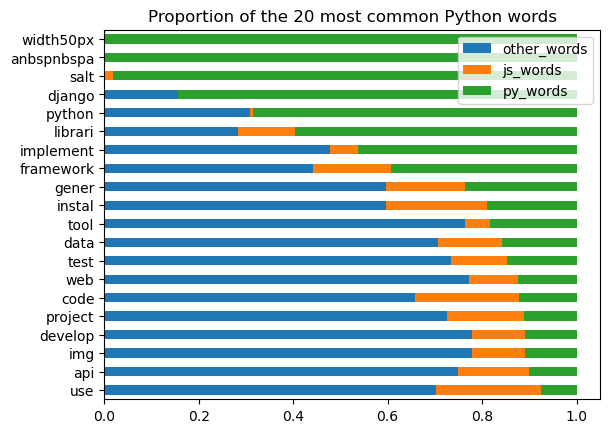

In [437]:
# figure out the percentage of words
(word_counts
 .assign(other_words=word_counts.other / word_counts['all'],
         js_words=word_counts.js / word_counts['all'],
         py_words=word_counts.python / word_counts['all'])
 .sort_values(by='python')
 [['other_words', 'js_words', 'py_words']]
 .tail(20)
 .sort_values('py_words')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common Python words')


Text(0.5, 1.0, 'Proportion of the 20 most common JavaScript words')

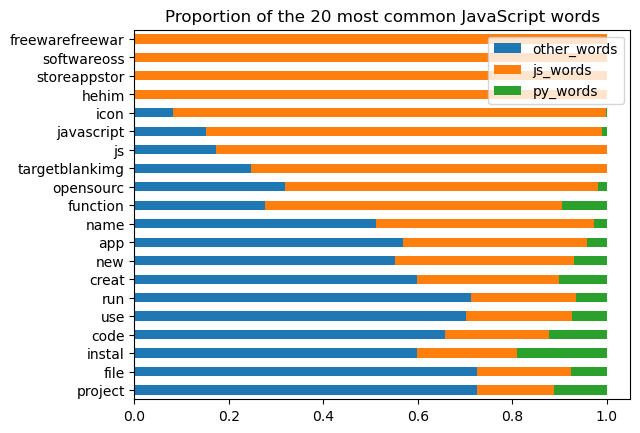

In [438]:
# figure out the percentage of words
(word_counts
 .assign(other_words=word_counts.other / word_counts['all'],
         js_words=word_counts.js / word_counts['all'],
         py_words=word_counts.python / word_counts['all'])
 .sort_values(by='js')
 [['other_words', 'js_words', 'py_words']]
 .tail(20)
 .sort_values('js_words')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common JavaScript words')


Text(0.5, 1.0, 'Proportion of the 20 most common Other words')

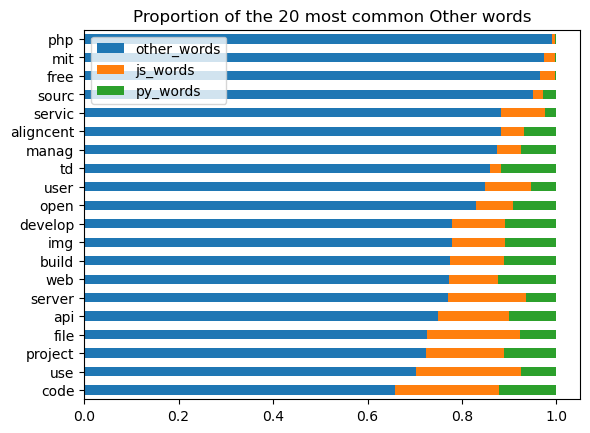

In [439]:
# figure out the percentage of words
(word_counts
 .assign(other_words=word_counts.other / word_counts['all'],
         js_words=word_counts.js / word_counts['all'],
         py_words=word_counts.python / word_counts['all'])
 .sort_values(by='other')
 [['other_words', 'js_words', 'py_words']]
 .tail(20)
 .sort_values('other_words')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common Other words')


In [440]:
python_words

['tornado',
 'web',
 'server',
 'imag',
 'alt',
 'join',
 'chat',
 'target',
 'tornado',
 'httpwwwtornadoweborg',
 'python',
 'web',
 'framework',
 'asynchron',
 'network',
 'librari',
 'origin',
 'develop',
 'friendfe',
 'httpfriendfeedcom',
 'use',
 'nonblock',
 'network',
 'io',
 'tornado',
 'scale',
 'ten',
 'thousand',
 'open',
 'connect',
 'make',
 'ideal',
 'long',
 'poll',
 'websocket',
 'applic',
 'requir',
 'longliv',
 'connect',
 'user',
 'hello',
 'world',
 'simpl',
 'hello',
 'world',
 'exampl',
 'web',
 'app',
 'tornado',
 'codeblock',
 'python',
 'import',
 'asyncio',
 'import',
 'tornado',
 'class',
 'def',
 'getself',
 'selfwritehello',
 'world',
 'def',
 'makeapp',
 'return',
 'tornadowebappl',
 'mainhandl',
 'async',
 'def',
 'main',
 'app',
 'makeapp',
 'applisten8888',
 'await',
 'asyncioeventwait',
 'name',
 'main',
 'asynciorunmain',
 'exampl',
 'use',
 'tornado',
 'asynchron',
 'featur',
 'see',
 'simpl',
 'chat',
 'room',
 'document',
 'document',
 'link',
 'ad

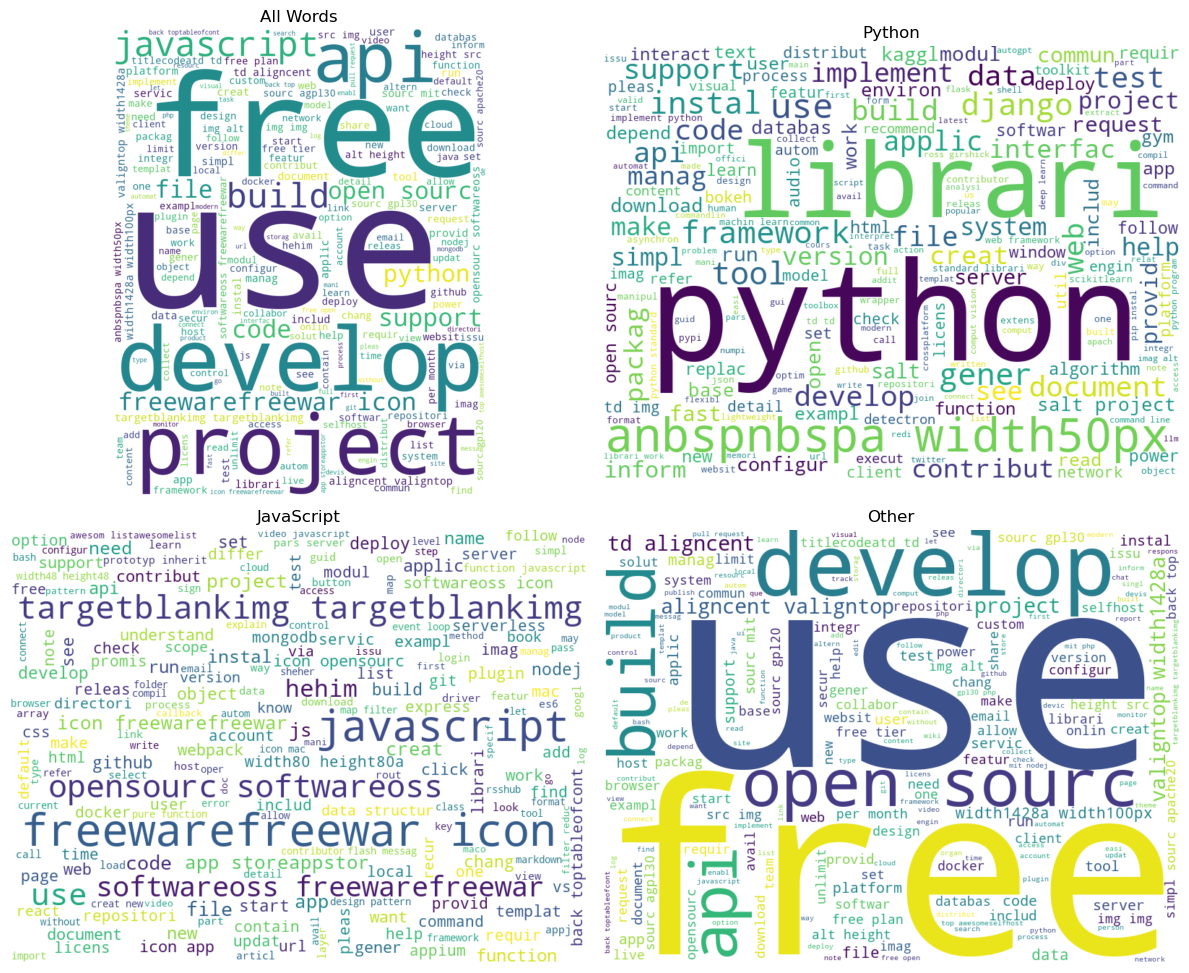

In [441]:

all_cloud = WordCloud(background_color='white', height=1000, width=800).generate(' '.join(all_words))
python_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(python_words))
js_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(js_words))
other_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(other_words))

plt.figure(figsize=(12, 10))

# Create an array of subplots
axs = [
    plt.subplot(2, 2, 1),
    plt.subplot(2, 2, 2),
    plt.subplot(2, 2, 3),
    plt.subplot(2, 2, 4)
]

# Plot each word cloud on a separate subplot
axs[0].imshow(all_cloud, interpolation='bilinear')
axs[1].imshow(python_cloud, interpolation='bilinear')
axs[2].imshow(js_cloud, interpolation='bilinear')
axs[3].imshow(other_cloud, interpolation='bilinear')

# Set titles for each subplot
axs[0].set_title('All Words')
axs[1].set_title('Python')
axs[2].set_title('JavaScript')
axs[3].set_title('Other')

# Turn off axis labels for all subplots
for ax in axs:
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Display the entire plot
plt.show()


In [445]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()


(anbspnbspa, width50px)    156
(python, librari)           26
(salt, project)             23
(python, python)            22
(open, sourc)               20
dtype: int64

In [446]:
top_20_js_bigrams = (pd.Series(nltk.ngrams(js_words, 2))
                      .value_counts()
                      .head(20))

top_20_js_bigrams.head()


(freewarefreewar, icon)             374
(targetblankimg, targetblankimg)    258
(opensourc, softwareoss)            251
(softwareoss, freewarefreewar)      199
(app, storeappstor)                  82
dtype: int64

In [447]:
top_20_other_bigrams = (pd.Series(nltk.ngrams(other_words, 2))
                      .value_counts()
                      .head(20))

top_20_other_bigrams.head()


(open, sourc)               314
(aligncent, valigntop)      285
(valigntop, width1428a)     279
(td, aligncent)             279
(width1428a, width100px)    274
dtype: int64

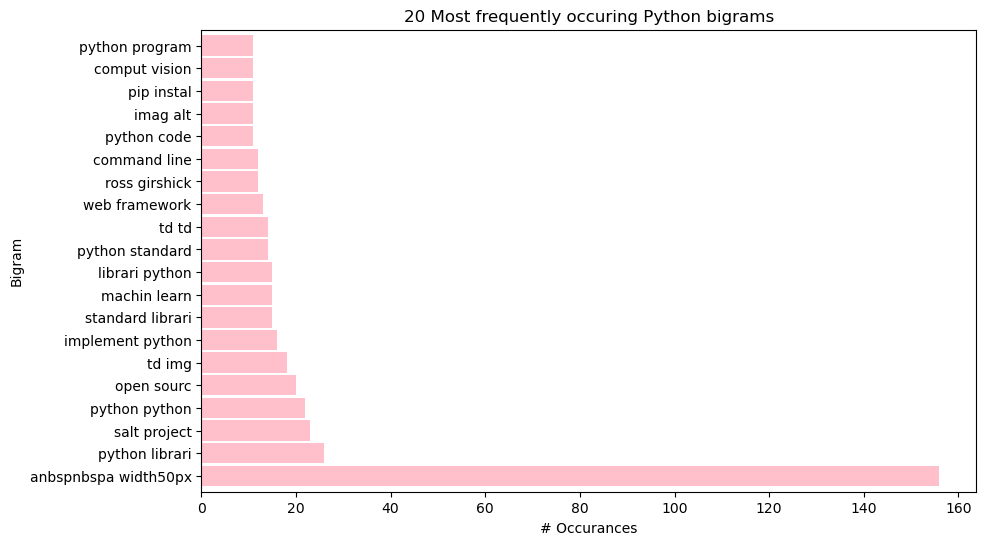

In [451]:
top_20_python_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


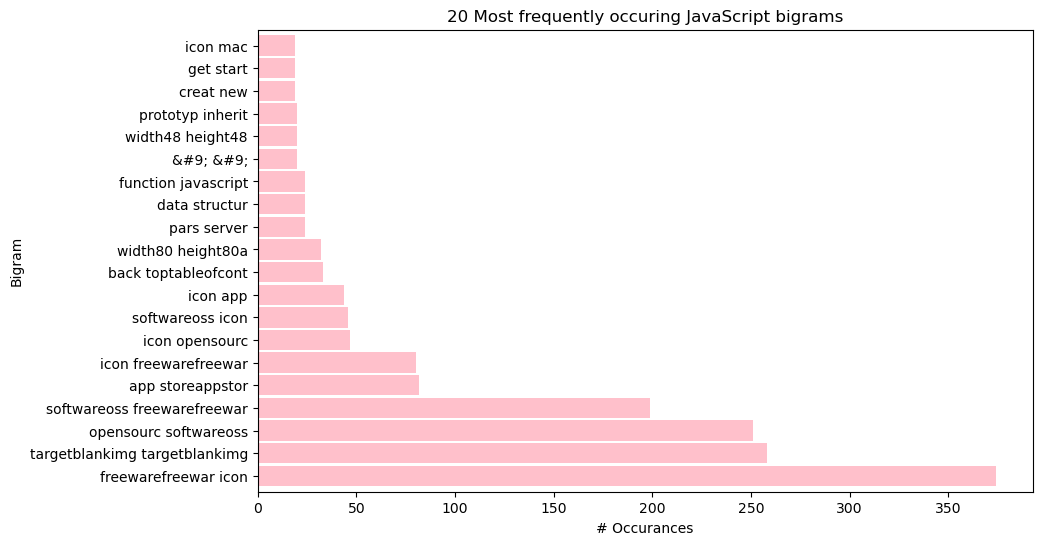

In [449]:
top_20_js_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring JavaScript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_js_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


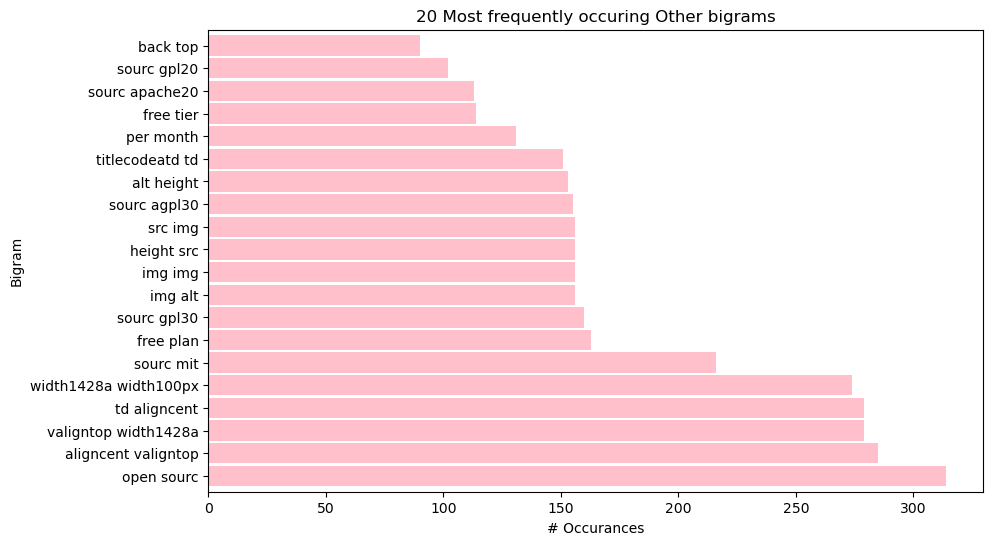

In [452]:
top_20_other_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Other bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_other_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


# Bag of Words

In [427]:
data = ' '.join(melted_word_counts['index']).split()


In [302]:
from sklearn.feature_extraction.text import CountVectorizer

# same basic process as any sklearn transformation:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform(data)

In [303]:
cv.vocabulary_


{'0bsd': 0,
 '0x19951125gmailcom': 1,
 '0xx': 2,
 '1000count': 3,
 '1000px': 4,
 '100gb': 5,
 '100gbmonth': 6,
 '100k': 7,
 '100kmonth': 8,
 '100m': 9,
 '100mb': 10,
 '100min': 11,
 '103rbacjwtoauth2': 12,
 '107e301': 13,
 '1080p': 14,
 '10a': 15,
 '10gb': 16,
 '10k': 17,
 '10k50kmonth': 18,
 '10kmo': 19,
 '10m': 20,
 '10mb': 21,
 '10x': 22,
 '115httppc115com': 23,
 '11m': 24,
 '120core': 25,
 '126e29': 26,
 '128m': 27,
 '128mb': 28,
 '12mo': 29,
 '14day': 30,
 '15gb': 31,
 '15mbfile': 32,
 '15x': 33,
 '160gb': 34,
 '16gb': 35,
 '16th': 36,
 '175k': 37,
 '17month': 38,
 '18httpnodejsorg': 39,
 '192k': 40,
 '192mb': 41,
 '1click': 42,
 '1clickhost': 43,
 '1d': 44,
 '1day': 45,
 '1day6680751md': 46,
 '1g': 47,
 '1gb': 48,
 '1gbh': 49,
 '1gbmonth': 50,
 '1h2': 51,
 '1hour': 52,
 '1imagesstep1gif': 53,
 '1k': 54,
 '1kbkey': 55,
 '1kday': 56,
 '1line': 57,
 '1m': 58,
 '1mb': 59,
 '1min': 60,
 '1ml': 61,
 '1month': 62,
 '1password': 63,
 '1px': 64,
 '1st': 65,
 '1tb': 66,
 '1vcpu': 67,
 '1x'

In [304]:
bow = pd.DataFrame(bag_of_words.todense())
bow.columns = cv.get_feature_names_out()

In [461]:
bow

,0bsd,0x19951125gmailcom,0xx,1000count,1000px,100gb,100gbmonth,100k,100kmonth,100m,...,zstylebas,zubehttpszubeio,zulip,zuliphttpszulipcom,zuliphttpszuliporg,zurb,zuul,zymiboxpay,zypper,zyszys98gmailcom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [459]:
word_df = bow.apply(lambda row: row / row.sum(), axis=1)
word_df

,0bsd,0x19951125gmailcom,0xx,1000count,1000px,100gb,100gbmonth,100k,100kmonth,100m,...,zstylebas,zubehttpszubeio,zulip,zuliphttpszulipcom,zuliphttpszuliporg,zurb,zuul,zymiboxpay,zypper,zyszys98gmailcom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [460]:
word_df.sum().max()

4.0